## Paso 1: Cargar los datos.
Levantamos los datos de los pacientes

In [2]:
# Read data from file

import numpy as np
import pandas as pd

file_name = './datos_de_pacientes_5000.csv'
data = pd.read_csv(file_name, index_col=0)

In [3]:
print("Datos de pacientes")
print("-----------------------")
print(data)

Datos de pacientes
-----------------------
      colesterol  presion  glucosa  edad  sobrepeso  tabaquismo  \
0            1.0      0.9      1.0     5          0           1   
1            2.4      1.4      1.8    72          0           0   
2            2.2      1.1      0.6    73          0           1   
3            2.2      1.3      1.2     4          0           1   
4            1.8      0.9      1.1    42          0           1   
...          ...      ...      ...   ...        ...         ...   
4995         2.5      1.0      0.9    72          0           1   
4996         2.2      1.0      1.3    72          1           1   
4997         2.4      0.7      1.8    51          1           1   
4998         2.4      1.6      1.0    15          0           1   
4999         2.1      1.3      1.2    27          0           0   

      riesgo_cardiaco  
0                   0  
1                   1  
2                   0  
3                   0  
4                   0  
...     

## Paso 2: Preprocesar los datos.

Separamos los datos de entrada de las etiquetas

Separamos conjuntos de training, validación y testing según sea necesario

In [10]:
# Date preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scaling numerical variables
scaler = MinMaxScaler()

# Separate the data from the target labels
X = data.drop(['riesgo_cardiaco'], axis=1)
y = np.array(data['riesgo_cardiaco'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# For training set
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)

# For testing set
scaled_X_test = scaler.transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)


In [11]:
print("Set de training")
print("---------------")
print(scaled_X_train)

Set de training
---------------
      colesterol   presion   glucosa      edad  sobrepeso  tabaquismo
0       0.578947  0.636364  0.857143  0.091837        0.0         1.0
1       0.631579  0.181818  1.000000  0.030612        0.0         1.0
2       0.947368  0.454545  0.214286  0.030612        1.0         1.0
3       0.157895  0.000000  0.214286  0.714286        0.0         1.0
4       0.894737  0.000000  0.214286  0.193878        1.0         0.0
...          ...       ...       ...       ...        ...         ...
3995    0.526316  0.181818  0.071429  0.989796        1.0         1.0
3996    0.000000  0.090909  0.357143  0.959184        0.0         0.0
3997    0.210526  0.272727  1.000000  0.357143        0.0         0.0
3998    0.684211  0.181818  0.071429  0.142857        1.0         0.0
3999    0.368421  0.727273  0.642857  0.969388        0.0         0.0

[4000 rows x 6 columns]


In [12]:
print("Set de test")
print("------------")
print(scaled_X_test)

Set de test
------------
     colesterol   presion   glucosa      edad  sobrepeso  tabaquismo
0      1.000000  0.181818  0.428571  0.673469        1.0         1.0
1      0.157895  0.000000  0.071429  0.153061        0.0         0.0
2      0.421053  0.545455  0.000000  0.673469        1.0         0.0
3      0.894737  0.818182  0.000000  1.000000        1.0         1.0
4      0.000000  0.181818  0.428571  0.857143        1.0         0.0
..          ...       ...       ...       ...        ...         ...
995    0.631579  0.545455  0.428571  0.887755        0.0         1.0
996    0.736842  0.363636  0.214286  0.887755        0.0         1.0
997    0.421053  0.181818  0.714286  0.438776        1.0         0.0
998    1.000000  0.000000  0.214286  0.846939        1.0         1.0
999    0.052632  0.181818  0.285714  0.918367        1.0         0.0

[1000 rows x 6 columns]


##Paso 3: Armo la red

In [13]:
# Build the Neural Network
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create the model
model = Sequential()

# 6 INPUT (colesterol, presión, glucosa, edad, sobrepeso, tabaquismo)
model.add(Dense(50, input_shape=(6,), activation='relu', kernel_initializer='uniform'))
model.add(Dense(25, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(35, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid')) # Sigmoid activation in the output layer

# Compile
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                350       
                                                                 
 dense_5 (Dense)             (None, 25)                1275      
                                                                 
 dense_6 (Dense)             (None, 35)                910       
                                                                 
 dense_7 (Dense)             (None, 1)                 36        
                                                                 
Total params: 2571 (10.04 KB)
Trainable params: 2571 (10.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Paso 4: Entreno la red neuronal

In [14]:
# Training
historicalModel = model.fit(scaled_X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=2)

Epoch 1/200
100/100 - 1s - loss: 0.5334 - val_loss: 0.3821 - 1s/epoch - 15ms/step
Epoch 2/200
100/100 - 0s - loss: 0.3121 - val_loss: 0.2293 - 247ms/epoch - 2ms/step
Epoch 3/200
100/100 - 0s - loss: 0.1989 - val_loss: 0.1339 - 286ms/epoch - 3ms/step
Epoch 4/200
100/100 - 0s - loss: 0.1760 - val_loss: 0.1949 - 256ms/epoch - 3ms/step
Epoch 5/200
100/100 - 0s - loss: 0.1383 - val_loss: 0.1051 - 245ms/epoch - 2ms/step
Epoch 6/200
100/100 - 0s - loss: 0.1350 - val_loss: 0.0900 - 254ms/epoch - 3ms/step
Epoch 7/200
100/100 - 0s - loss: 0.1027 - val_loss: 0.0881 - 262ms/epoch - 3ms/step
Epoch 8/200
100/100 - 0s - loss: 0.1113 - val_loss: 0.1183 - 402ms/epoch - 4ms/step
Epoch 9/200
100/100 - 0s - loss: 0.1049 - val_loss: 0.0702 - 359ms/epoch - 4ms/step
Epoch 10/200
100/100 - 0s - loss: 0.0957 - val_loss: 0.0680 - 370ms/epoch - 4ms/step
Epoch 11/200
100/100 - 0s - loss: 0.0771 - val_loss: 0.0973 - 370ms/epoch - 4ms/step
Epoch 12/200
100/100 - 0s - loss: 0.0836 - val_loss: 0.0490 - 402ms/epoch - 

##Paso 5: Evaluo la red

In [15]:
# Make predictions with the model
y_pred = model.predict(scaled_X_test)


32/32 [==============================] - 0s 2ms/step


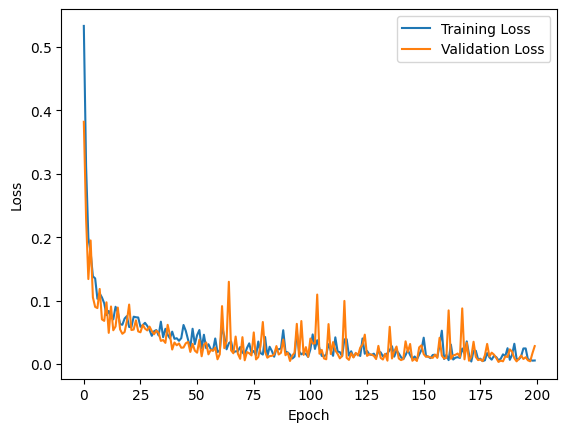

In [17]:
import matplotlib.pyplot as plt

# Visualización de la pérdida
plt.plot(historicalModel.history['loss'], label='Training Loss')
plt.plot(historicalModel.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Evaluate
result = model.evaluate(scaled_X_test, y_test)
print("Evaluate the model: ",result)

32/32 [==============================] - 0s 2ms/step - loss: 0.0329
Evaluate the model:  0.032914016395807266


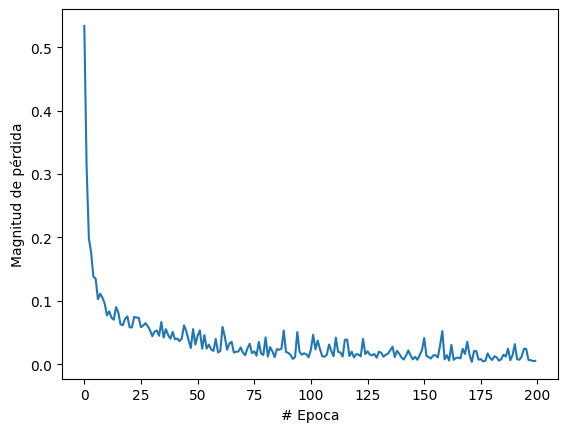

In [21]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historicalModel.history["loss"])

In [24]:
print("Datos a predecir:")
print(X_train[:3])
print("-----------------")

print("Resultados obtenidos:")
print(y_pred[:3])
print("Valores correctos:")
print(y_test[:3])

Datos a predecir:
      colesterol  presion  glucosa  edad  sobrepeso  tabaquismo
3126         2.1      1.3      1.7     9          0           1
2014         2.2      0.8      1.9     3          0           1
2541         2.8      1.1      0.8     3          1           1
-----------------
Resultados obtenidos:
[[1.000000e+00]
 [3.161971e-11]
 [4.767037e-09]]
Valores correctos:
[1 0 0]


In [13]:
model.save("model.keras")
model = keras.models.load_model("model.keras")